<a href="https://colab.research.google.com/github/dhanesh-vaghasiya/car-model-predictor/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📦 Install all required libraries (Colab-friendly)
!pip install -q pandas numpy matplotlib seaborn scikit-learn xgboost tqdm


In [ ]:
!pip install kaggle

In [ ]:
# 🔧 Core Libraries
import numpy as np
import pandas as pd

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# 🧼 Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 🤖 Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# 🤖 Metrics
# 📈 Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [4]:
import kagglehub
kagglehub.login()
# Download latest version

path = kagglehub.dataset_download("CooperUnion/cardataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cardataset


In [5]:
df = pd.read_csv(path + '/data.csv')

In [6]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [7]:
df.sample(50)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8023,Mitsubishi,Raider,2008,regular unleaded,210.0,6.0,AUTOMATIC,four wheel drive,4.0,NaN,Compact,Crew Cab Pickup,18,14,436,28780
11249,Chevrolet,Venture,2003,regular unleaded,185.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,24,17,1385,26340
10113,Suzuki,Swift,2001,regular unleaded,79.0,4.0,AUTOMATIC,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,31,26,481,9949
5195,Pontiac,G6,2009,regular unleaded,164.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,30,22,210,21165
4555,Ford,F-150,2017,flex-fuel (unleaded/E85),385.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Extended Cab Pickup,21,15,5657,40070
7420,Porsche,Panamera,2015,premium unleaded (required),520.0,8.0,AUTOMATED_MANUAL,all wheel drive,4.0,"Luxury,High-Performance",Large,Sedan,24,15,1715,161100
11074,Chevrolet,Uplander,2006,regular unleaded,201.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Passenger Minivan,23,16,1385,19250
1260,Honda,Accord,2017,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,NaN,Midsize,Coupe,32,23,2202,24025
6835,Mitsubishi,Mirage,2015,regular unleaded,74.0,3.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,44,37,436,14095
6662,Chevrolet,Malibu Maxx,2005,regular unleaded,200.0,6.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Midsize,4dr Hatchback,28,20,1385,20965


In [8]:
df['Market Category'] = df['Market Category'].fillna('None')


In [9]:
df['Market Category'] = df['Market Category'].apply(lambda x: x.split(','))


In [10]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
market_cat_df = pd.DataFrame(
    mlb.fit_transform(df['Market Category']),
    columns=mlb.classes_,
    index=df.index
)
df = pd.concat([df.drop(columns=['Market Category']), market_cat_df], axis=1)


In [ ]:
df.drop(columns=["None"])

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,...,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,1,0,0,1,0,1,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,1
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,1,0,1,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,1
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,...,1,0,0,0,0,1,0,0,1,0
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,...,1,0,0,0,0,1,0,0,1,0
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,...,1,0,0,0,0,1,0,0,1,0
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,...,1,0,0,0,0,1,0,0,1,0


In [12]:
df.dropna(subset=['Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Number of Doors'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop(columns=["None"], inplace=True)

In [11]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP', 'Crossover', 'Diesel', 'Exotic',
       'Factory Tuner', 'Flex Fuel', 'Hatchback', 'High-Performance', 'Hybrid',
       'Luxury', 'None', 'Performance'],
      dtype='object')

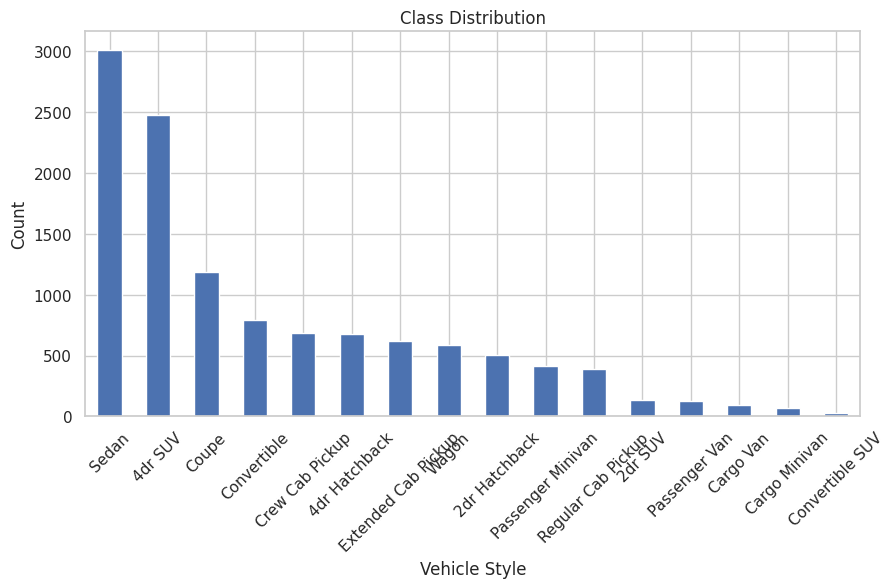

In [13]:
df['Vehicle Style'].value_counts().plot(kind='bar', figsize=(10, 5), title='Class Distribution')
plt.ylabel("Count")
plt.xlabel("Vehicle Style")
plt.xticks(rotation=45)
plt.show()


In [14]:

print(df['Transmission Type'].value_counts(normalize=True) * 100)

# Driven Wheels distribution
print(df['Driven_Wheels'].value_counts(normalize=True) * 100)

Transmission Type
AUTOMATIC           69.683373
MANUAL              24.737555
AUTOMATED_MANUAL     5.291229
UNKNOWN              0.160853
DIRECT_DRIVE         0.126990
Name: proportion, dtype: float64
Driven_Wheels
front wheel drive    40.060955
rear wheel drive     28.284795
all wheel drive      19.776498
four wheel drive     11.877751
Name: proportion, dtype: float64


In [15]:
print(df['Transmission Type'].unique())
print(df['Driven_Wheels'].unique())


['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'UNKNOWN' 'DIRECT_DRIVE']
['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']


In [16]:
pd.crosstab(df['Transmission Type'], df['Vehicle Style'])


Vehicle Style,2dr Hatchback,2dr SUV,4dr Hatchback,4dr SUV,Cargo Minivan,Cargo Van,Convertible,Convertible SUV,Coupe,Crew Cab Pickup,Extended Cab Pickup,Passenger Minivan,Passenger Van,Regular Cab Pickup,Sedan,Wagon
Transmission Type,,,,,,,,,,,,,,,,
AUTOMATED_MANUAL,57,0,54,26,0,0,135,0,126,0,0,0,0,0,209,18
AUTOMATIC,125,44,352,2348,70,95,336,8,495,643,366,397,128,159,2232,433
DIRECT_DRIVE,0,0,13,0,0,0,0,0,0,0,0,0,0,0,2,0
MANUAL,319,90,259,106,0,0,320,21,567,38,257,15,0,225,569,136
UNKNOWN,2,4,0,0,0,0,2,0,2,0,0,0,0,8,1,0


In [50]:
# Replace rare types with 'OTHER'
df['Transmission Type'] = df['Transmission Type'].replace(['UNKNOWN', 'DIRECT_DRIVE'], 'OTHER')


In [18]:
pd.crosstab(df['Driven_Wheels'], df['Vehicle Style'])
df.drop(columns=["Popularity"], inplace=True)

In [19]:
df['Combined MPG'] = df[['highway MPG', 'city mpg']].mean(axis=1)
df.drop(columns=['highway MPG', 'city mpg'], inplace=True)


In [21]:
price_bins = [0, 20000, 35000, 60000, 100000, np.inf]
price_labels = ['Budget', 'Mid-Range', 'Premium', 'Luxury', 'Exotic']

df['Price Range'] = pd.cut(df['MSRP'], bins=price_bins, labels=price_labels)

# Drop original MSRP column if desired
df.drop(columns=['MSRP'], inplace=True)


In [22]:
df["Price Range"].unique()

['Premium', 'Mid-Range', 'Budget', 'Exotic', 'Luxury']
Categories (5, object): ['Budget' < 'Mid-Range' < 'Premium' < 'Luxury' < 'Exotic']

In [23]:
df['Car Age'] = 2025 - df['Year']
df.drop(columns=['Year'], inplace=True)


In [25]:
df['Engine Fuel Type'] = df['Engine Fuel Type'].replace({
    'premium unleaded (required)': 'gasoline',
    'premium unleaded (recommended)': 'gasoline',
    'regular unleaded': 'gasoline',
    'flex-fuel (unleaded/E85)': 'flex',
    'flex-fuel (premium unleaded recommended/E85)': 'flex',
    'diesel': 'diesel',
    'electric': 'alternative',
    'natural gas': 'alternative',
    'flex-fuel (premium unleaded required/E85)': 'flex',
    'flex-fuel (unleaded/E85)': 'flex'
})


In [59]:
df["Market Category Count"].unique()

array([14, 13, 12, 33, 32, 31,  8, 34,  9, 35, 10, 29, 28, 27, 11, 26, 23,
       22, 21, 30, 18, 17, 16, 24, 15, 25, 20, 19])

In [57]:
df["Combined MPG"].describe()

,Combined MPG
count,11812.000000
mean,22.824543
std,6.714380
min,9.500000
25%,18.500000
50%,22.000000
75%,26.000000
max,189.000000


In [27]:
mlb.classes_ = mlb.classes_[mlb.classes_!= "None"]

In [28]:
df['Market Category Count'] = df[mlb.classes_].sum(axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11812 entries, 0 to 11811
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Make                   11812 non-null  object  
 1   Engine Fuel Type       11812 non-null  object  
 2   Engine HP              11812 non-null  float64 
 3   Engine Cylinders       11812 non-null  float64 
 4   Transmission Type      11812 non-null  object  
 5   Driven_Wheels          11812 non-null  object  
 6   Number of Doors        11812 non-null  float64 
 7   Vehicle Size           11812 non-null  object  
 8   Vehicle Style          11812 non-null  object  
 9   Crossover              11812 non-null  int64   
 10  Diesel                 11812 non-null  int64   
 11  Exotic                 11812 non-null  int64   
 12  Factory Tuner          11812 non-null  int64   
 13  Flex Fuel              11812 non-null  int64   
 14  Hatchback              11812 non-null 

In [36]:
df.drop(columns="Model", inplace=True)

Model Training start from below:


---

In [62]:

X = df.drop(columns=['Vehicle Style'])
y = df['Vehicle Style']


le = LabelEncoder()
y = le.fit_transform(df['Vehicle Style'])   # You encoded the target
class_names = le.classes_

# Numeric columns (you can tweak this as needed)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical columns (excluding binary columns created earlier)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()



In [34]:
numeric_cols

['Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'Crossover',
 'Diesel',
 'Exotic',
 'Factory Tuner',
 'Flex Fuel',
 'Hatchback',
 'High-Performance',
 'Hybrid',
 'Luxury',
 'Performance',
 'Combined MPG',
 'Car Age',
 'Market Category Count']

In [38]:
categorical_cols

['Make',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Vehicle Size']

In [63]:

# Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing for numeric and categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'  # keep binary features from Market Category
)

In [64]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [65]:

model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train
model.fit(X_train, y_train)

ValueError: scipy.sparse does not support dtype object. The only supported types are: bool, int8, uint8, int16, uint16, int32, uint32, int64, uint64, longlong, ulonglong, float32, float64, longdouble, complex64, complex128, clongdouble.

In [ ]:
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])


In [66]:
model_xgb = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(
        objective='multi:softmax',
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42
    ))
])


In [72]:
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 6],
}


In [ ]:
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l2'],  # 'l1' only works with solver='liblinear'
    'classifier__solver': ['lbfgs'],  # safe choice for multiclass + l2
}


In [ ]:
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__class_weight': ['balanced']  # to help with imbalance
}


In [69]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    model,
    param_grid,
    cv=3,                      # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1                  # use all cores
)

grid_search.fit(X_train, y_train)


NameError: name 'param_grid' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search_rf = GridSearchCV(
    model_rf,
    param_grid_rf,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Year',
                                                                          'Engine '
                                                                          'HP',
                                                                          'Engine '
                                                                          'Cylinders',
                                                                          'Number '
                                                                          'of '
                                                                          'Doors',
                                                                          'highway '
                                                                          'MPG',
                                                                          'city '
                                                                          'mpg',
                                                                          'Popularity',
                                                                          'MSRP',
                                                                          'Crossover',
                                                                          'Diesel',
                                                                          'Exotic',
                                                                          'Factory '
                                                                          'Tuner',
                                                                          'Flex '
                                                                          'Fuel',
                                                                          'Hatchback',
                                                                          'High-Performance',
                                                                          'Hybrid',
                                                                          '...
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Make',
                                                                          'Model',
                                                                          'Engine '
                                                                          'Fuel '
                                                                          'Type',
                                                                          'Transmission '
                                                                          'Type',
                                                                          'Driven_Wheels',
                                                                          'Vehicle '
                                                                          'Size'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': ['balanced'],
                         'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy')

In [73]:

grid_search_xgb = GridSearchCV(
    model_xgb,
    param_grid_xgb,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_xgb.fit(X_train, y_train)


ValueError: 
All the 24 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py", line 1031, in fit_transform
    return self._hstack(list(Xs), n_samples=n_samples)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py", line 1145, in _hstack
    return sparse.hstack(converted_Xs).tocsr()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scipy/sparse/_construct.py", line 756, in hstack
    return _block([blocks], format, dtype, return_spmatrix=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scipy/sparse/_construct.py", line 961, in _block
    A = coo_array(blocks[i,j])
        ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scipy/sparse/_coo.py", line 95, in __init__
    self.data = getdata(M[coords], copy=copy, dtype=dtype)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scipy/sparse/_sputils.py", line 150, in getdata
    getdtype(data.dtype)
  File "/usr/local/lib/python3.11/dist-packages/scipy/sparse/_sputils.py", line 137, in getdtype
    raise ValueError(f"scipy.sparse does not support dtype {newdtype.name}. "
ValueError: scipy.sparse does not support dtype object. The only supported types are: bool, int8, uint8, int16, uint16, int32, uint32, int64, uint64, longlong, ulonglong, float32, float64, longdouble, complex64, complex128, clongdouble.


In [ ]:
results = {}

In [ ]:
y_pred_xgb = grid_search_xgb.predict(X_test)

results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'F1 Score (macro)': f1_score(y_test, y_pred_xgb, average='macro'),
    'F1 Score (weighted)': f1_score(y_test, y_pred_xgb, average='weighted'),
}


In [ ]:
print(classification_report(y_test, y_pred_xgb, target_names=class_names))

                     precision    recall  f1-score   support

      2dr Hatchback       1.00      1.00      1.00       101
            2dr SUV       0.97      1.00      0.98        28
      4dr Hatchback       1.00      1.00      1.00       136
            4dr SUV       1.00      1.00      1.00       496
      Cargo Minivan       0.86      0.86      0.86        14
          Cargo Van       1.00      0.95      0.97        19
        Convertible       0.79      0.69      0.73       159
    Convertible SUV       1.00      1.00      1.00         6
              Coupe       0.81      0.88      0.84       238
    Crew Cab Pickup       0.84      0.90      0.87       136
Extended Cab Pickup       0.82      0.74      0.78       125
  Passenger Minivan       0.96      0.98      0.97        82
      Passenger Van       1.00      1.00      1.00        25
 Regular Cab Pickup       0.88      0.90      0.89        78
              Sedan       0.95      0.99      0.97       603
              Wagon    

In [ ]:
y_pred = model.predict(X_test)


NotFittedError: Pipeline is not fitted yet.

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))
#run with randomforest

                     precision    recall  f1-score   support

      2dr Hatchback       0.99      0.99      0.99       101
            2dr SUV       0.97      1.00      0.98        28
      4dr Hatchback       0.99      1.00      1.00       136
            4dr SUV       1.00      1.00      1.00       496
      Cargo Minivan       0.80      0.86      0.83        14
          Cargo Van       1.00      0.95      0.97        19
        Convertible       0.78      0.67      0.72       159
    Convertible SUV       1.00      1.00      1.00         6
              Coupe       0.80      0.87      0.84       238
    Crew Cab Pickup       0.83      0.85      0.84       136
Extended Cab Pickup       0.75      0.69      0.72       125
  Passenger Minivan       0.97      0.95      0.96        82
      Passenger Van       0.96      1.00      0.98        25
 Regular Cab Pickup       0.80      0.87      0.83        78
              Sedan       0.96      0.98      0.97       603
              Wagon    

In [ ]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred, target_names=class_names))
#Run with logistic regression

                     precision    recall  f1-score   support

      2dr Hatchback       1.00      1.00      1.00       101
            2dr SUV       0.96      0.96      0.96        28
      4dr Hatchback       1.00      1.00      1.00       136
            4dr SUV       1.00      0.99      1.00       496
      Cargo Minivan       0.64      1.00      0.78        14
          Cargo Van       1.00      1.00      1.00        19
        Convertible       0.72      0.73      0.73       159
    Convertible SUV       0.86      1.00      0.92         6
              Coupe       0.82      0.81      0.81       238
    Crew Cab Pickup       0.85      0.89      0.87       136
Extended Cab Pickup       0.80      0.70      0.75       125
  Passenger Minivan       0.96      0.91      0.94        82
      Passenger Van       1.00      1.00      1.00        25
 Regular Cab Pickup       0.82      0.92      0.87        78
              Sedan       0.99      0.92      0.95       603
              Wagon    

In [ ]:
results = {}

In [ ]:

results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'F1 Score (macro)': f1_score(y_test, y_pred, average='macro'),
    'F1 Score (weighted)': f1_score(y_test, y_pred, average='weighted'),
}

In [ ]:

y_pred_rf = grid_search.predict(X_test)

results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'F1 Score (macro)': f1_score(y_test, y_pred_rf, average='macro'),
    'F1 Score (weighted)': f1_score(y_test, y_pred_rf, average='weighted'),
}

In [ ]:
model_rf = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [ ]:
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__class_weight': ['balanced']  # to help with imbalance
}


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


In [ ]:
results_df = pd.DataFrame(results).T
display(results_df)


,Accuracy,F1 Score (macro),F1 Score (weighted)
Logistic Regression,0.911130,0.899888,0.912302
Random Forest,0.911130,0.899888,0.912302
XGBoost,0.923402,0.914583,0.922032


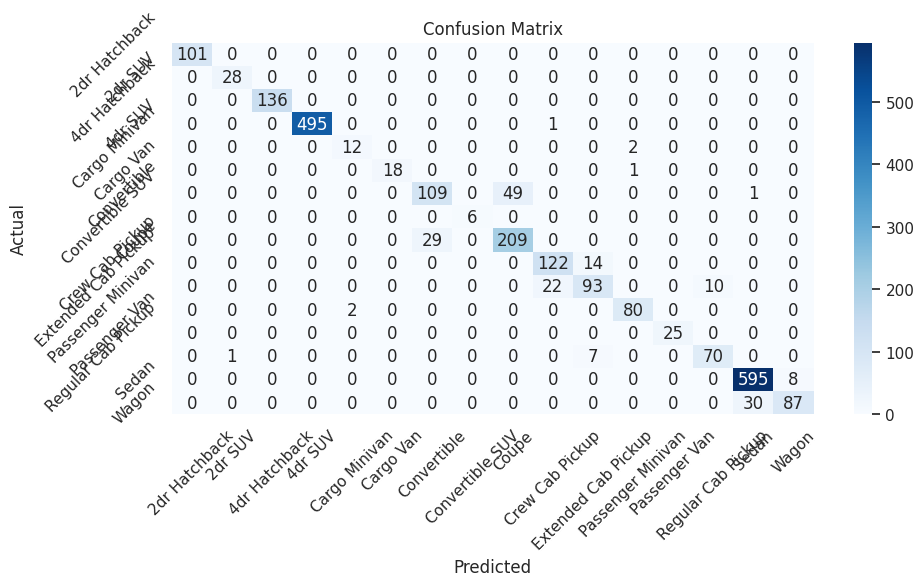

In [ ]:

cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

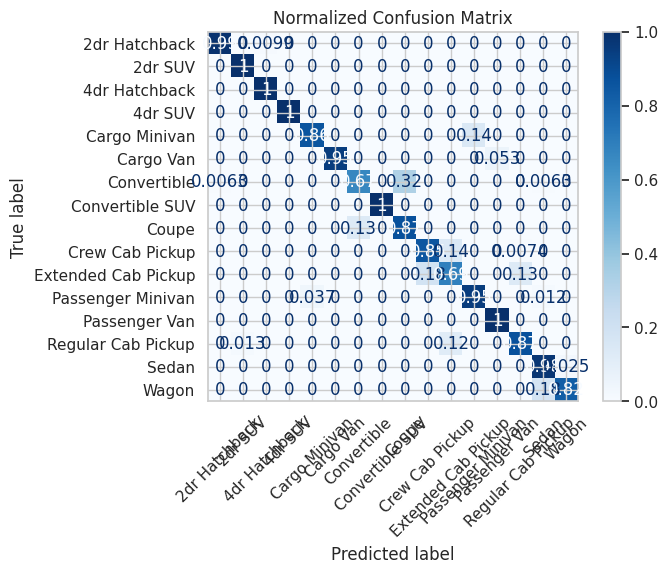

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=class_names,
    cmap='Blues',
    normalize='true',  # ← normalize per actual class
    xticks_rotation=45
)
plt.title("Normalized Confusion Matrix")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92


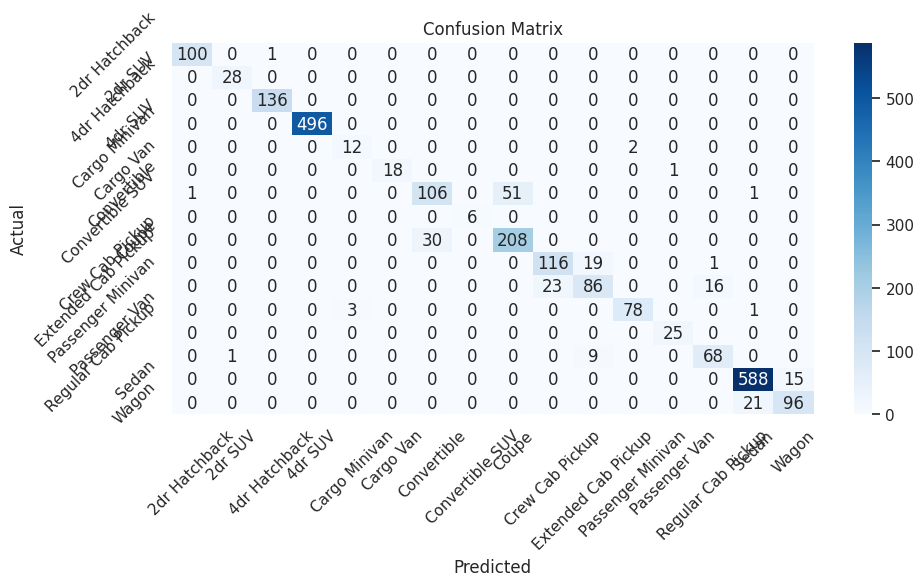

In [ ]:
#from ramdomforest
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()